In [1]:
from pyimzml.ImzMLParser import ImzMLParser
from pyimzml.ImzMLParser import getionimage
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame as df

In [2]:
# Test with example image
f = './Example_Processed_imzML1.1.1/Example_Processed.imzML'
p = ImzMLParser(f, parse_lib='ElementTree')

In [3]:
# Okay now lett's try a real file...

In [4]:
p.imzmldict

{'max count of pixels x': 3,
 'max count of pixels y': 3,
 'max dimension x': 300,
 'max dimension y': 300,
 'pixel size x': 100.0,
 'pixel size y': 100.0,
 'max count of pixels z': 1}

In [5]:
getionimage(p,100,tol=0.1,z=1,reduce_func=sum)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [6]:
p.getspectrum(1)

(array([100.083336, 100.166664, 100.25    , ..., 799.75    , 799.8334  ,
        799.9167  ], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.29609874, 0.05869249,
        0.        ], dtype=float32))

In [7]:
mz, inten = p.getspectrum(1)

In [8]:
np.argmax(inten)

636

In [9]:
mz[636]

153.08333

In [10]:
getionimage(p,153.08333,tol=0.1,z=1,reduce_func=sum)

array([[ 2.96778995, 11.10093045,  6.89041758],
       [12.81985617,  2.96167874,  3.82595736],
       [ 4.70858669,  6.54522926, 22.46983051]])

In [11]:
p_2d_np = getionimage(p,153.08333,tol=0.1,z=1,reduce_func=sum)

<IPython.core.display.Javascript object>


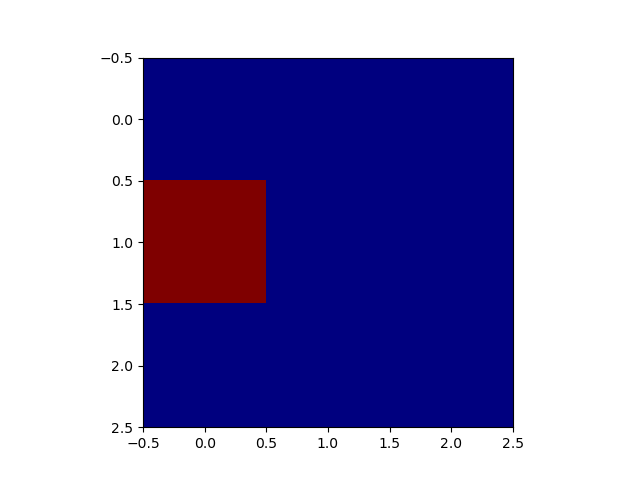

In [12]:
%matplotlib notebook
plt.imshow(p_2d_np, cmap='jet', interpolation ='nearest')

In [194]:
# Try a real image!
f = '/Users/dis/vm/windows_vm.nosync/Maldi_standard_data/MALDI_pos_DHB_60-360mz/28052019_MZ_1st_spotting_DHB_mz60-360_pos_pix 220X220.imzML'
p = ImzMLParser(f, parse_lib='ElementTree')

In [13]:
p.imzmldict

{'max count of pixels x': 3,
 'max count of pixels y': 3,
 'max dimension x': 300,
 'max dimension y': 300,
 'pixel size x': 100.0,
 'pixel size y': 100.0,
 'max count of pixels z': 1}

In [14]:
mz, inten = p.getspectrum(1000)

IndexError: list index out of range

In [15]:
np.argmax(inten)

636

In [16]:
mz[3193]

366.1667

In [27]:
p_2d_np = getionimage(p,295.0209,tol=1.0,z=1,reduce_func=sum)
plt.imshow(p_2d_np, cmap='jet', interpolation ='none')

In [19]:
for n in range(1417, 3600):
    print(n)
    m = n / 10
    p_2d_np = getionimage(p, m, tol=0.1,z=1,reduce_func=sum)
    name = "mz_" + str(n) +'.png'
    plt.imshow(p_2d_np, cmap='jet', interpolation ='none')
    plt.savefig(name)

1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492


KeyboardInterrupt: 

In [28]:
test_3d = np.array([[[0., 1., 2., 3.]]])

In [33]:
f = '/Users/dis/vm/windows_vm.nosync/Maldi_standard_data/MALDI_pos_DHB_60-360mz/28052019_MZ_1st_spotting_DHB_mz60-360_pos_pix 220X220.imzML'
p = ImzMLParser(f, parse_lib='ElementTree')

In [34]:
MZ_2031 = getionimage(p, 203.1, tol=0.1,z=1,reduce_func=sum)
MZ_2299 = getionimage(p, 229.9, tol=0.1,z=1,reduce_func=sum)
MZ_2300 = getionimage(p, 230.0, tol=0.1,z=1,reduce_func=sum)
MZ_2309 = getionimage(p, 230.9, tol=0.1,z=1,reduce_func=sum)
MZ_2310 = getionimage(p, 231.0, tol=0.1,z=1,reduce_func=sum)
MZ_2040 = getionimage(p, 204.0, tol=0.1,z=1,reduce_func=sum)
MZ_2352 = getionimage(p, 235.2, tol=0.1,z=1,reduce_func=sum)
MZ_2500 = getionimage(p, 250.0, tol=0.1,z=1,reduce_func=sum)
MZ_2501 = getionimage(p, 250.1, tol=0.1,z=1,reduce_func=sum)
MZ_2610 = getionimage(p, 261.0, tol=0.1,z=1,reduce_func=sum)

In [35]:
mask = MZ_2031 + MZ_2299 + MZ_2300 + MZ_2309 + MZ_2310 + MZ_2040 + MZ_2352 + MZ_2500 + MZ_2501 + MZ_2610

In [36]:
mask

array([[ 5112.38109589,  4116.80747986,  7393.38962555, ...,
         3439.02164841,  2264.70174408,  1344.46492004],
       [ 3830.75009155,  4892.31604004,  4657.83921814, ...,
         2857.3904953 ,  2138.46592712,  2130.92911148],
       [ 3306.52830124,  6635.19953918, 12777.62350845, ...,
         1954.41307068,  3689.846138  ,  1966.38414764],
       ...,
       [ 4168.59876633,  5242.92129898, 22283.6059494 , ...,
          664.25596619,  1526.29924774,  1691.69535446],
       [ 6312.13051224,  7419.76334381, 17229.08725357, ...,
         3942.86478424,  1833.08164215,  1408.38676453],
       [ 4595.32429886,  3535.95194244,  4905.60980225, ...,
          989.61483002,  1605.43605423,  1984.64535141]])

In [40]:
from xy_dict import MALDI_pos_DHB_60_360mz as spots

<IPython.core.display.Javascript object>


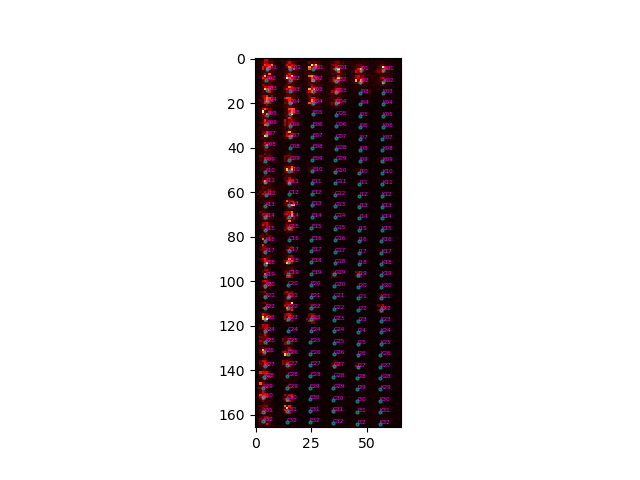

In [59]:
%matplotlib notebook
plt.imshow(mask, cmap='hot', interpolation ='none')

for kv in spots.items():
    key = kv[0]
    xy = kv[1]
    x = xy[0]
    y = xy[1]

    plt.scatter(x, y, c='cyan', s=5, alpha=0.33)
    plt.text(x, y, key, c='magenta', fontsize=4)





In [60]:
class Formatter(object):
    def __init__(self, im):
        self.im = im
    def __call__(self, x, y):
        z = self.im.get_array()[int(y), int(x)]
        return 'x={:.01f}, y={:.01f}, z={:.01f}'.format(x, y, z)

In [61]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [4, 8]

<IPython.core.display.Javascript object>


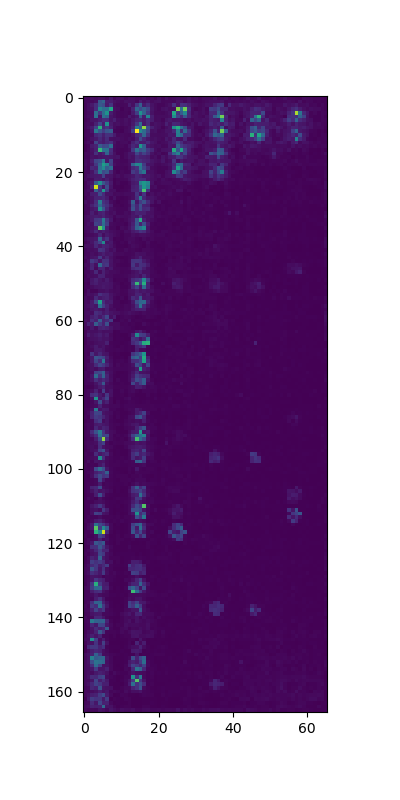

In [62]:
fig, ax = plt.subplots()
im = ax.imshow(mask, interpolation='none')
ax.format_coord = Formatter(im)
plt.show()

Approach:
1) Identify m/z target that correlates with position of spots.
    MZ_2031, MZ_2299, MZ_2300, MZ_2309, MZ_2310, MZ_2040, MZ_2352,
    MZ_2500, MZ_2501, MZ_2610
2) Build dataframe as list of "getionimage", Vectorize with apply.
3) Identify spot location.
    -Find centerpoint and enter into program
    -Identify 3x3 around each
4) Average thoes 9 spectra for each m/z as int.
5) Export as Label, m/z, int
6) Join to meta-data
7) Process

In [63]:
test_mz = list(range(100,125))

In [64]:
calc = pd.DataFrame()

In [65]:
calc['mz'] = test_mz

In [66]:
calc

,mz
0,100
1,101
2,102
3,103
4,104
5,105
6,106
7,107
8,108
9,109


In [67]:
calc['img'] = calc['mz'].apply(lambda x: getionimage(p, x, tol=0.1,z=1,reduce_func=sum))

In [68]:
calc.head()

,mz,img
0,100,"[[17318.986328125, 18769.138671875, 16480.9082..."
1,101,"[[1757.1282005310059, 2044.0520629882812, 2062..."
2,102,"[[0.0, 43.3878059387207, 0.0, 0.0, 49.41405487..."
3,103,"[[730.0203247070312, 0.0, 172.08899688720703, ..."
4,104,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [69]:
x = int(5.1)
y = int(4.4)

In [70]:
# x's first, then y's
extract_arr = np.array([[x-1, x-1, x-1, x, x, x, x+1, x+1, x+1], 
                        [y-1, y, y+1, y-1, y, y+1, y-1, y, y+1]])

In [71]:
extract_arr

array([[4, 4, 4, 5, 5, 5, 6, 6, 6],
       [3, 4, 5, 3, 4, 5, 3, 4, 5]])

In [72]:
calc['A01'] = calc['img'].apply(lambda m: np.sum(m[[x-1, x-1, x-1,
                                                    x, x, x,
                                                    x+1, x+1, x+1],
                                                   [y-1, y, y+1,
                                                    y-1, y, y+1,
                                                    y-1, y, y+1]]))

In [73]:
# Test
calc['A01'] = calc['img'].apply(lambda x: np.sum(x[[4,4,4,5,5,5,6,6,6],
                                            [3,4,5,3,4,5,3,4,5]]))

In [74]:
calc.head()

,mz,img,A01
0,100,"[[17318.986328125, 18769.138671875, 16480.9082...",128249.907578
1,101,"[[1757.1282005310059, 2044.0520629882812, 2062...",10700.725197
2,102,"[[0.0, 43.3878059387207, 0.0, 0.0, 49.41405487...",125.464382
3,103,"[[730.0203247070312, 0.0, 172.08899688720703, ...",351.552002
4,104,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",390.396004


In [75]:
x = calc.A01[0]

In [76]:
x

128249.90757751465

In [77]:
np.sum(x)

128249.90757751465

In [78]:
# Drop big matrix column
# Make metadata table.
# Join (X,Y) to table.

In [79]:
n = ['01', '02', '03', '04', '05', '06', '07', '08', '09']
m = list(range(10,33))

In [80]:
o = n + m

In [81]:
o

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [82]:
a = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']

In [83]:
out = []
for alpha in a:
    for num in o:
        cor = str(alpha) + str(num)
        out.append(cor)

In [84]:
out

['A01',
 'A02',
 'A03',
 'A04',
 'A05',
 'A06',
 'A07',
 'A08',
 'A09',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16',
 'A17',
 'A18',
 'A19',
 'A20',
 'A21',
 'A22',
 'A23',
 'A24',
 'A25',
 'A26',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A32',
 'B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B09',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B16',
 'B17',
 'B18',
 'B19',
 'B20',
 'B21',
 'B22',
 'B23',
 'B24',
 'B25',
 'B26',
 'B27',
 'B28',
 'B29',
 'B30',
 'B31',
 'B32',
 'C01',
 'C02',
 'C03',
 'C04',
 'C05',
 'C06',
 'C07',
 'C08',
 'C09',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C29',
 'C30',
 'C31',
 'C32',
 'D01',
 'D02',
 'D03',
 'D04',
 'D05',
 'D06',
 'D07',
 'D08',
 'D09',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'D16',
 'D17',
 'D18',
 'D19',
 'D20',
 'D21',
 'D22',
 'D23',
 'D24',
 'D25',
 'D26',
 'D27',
 'D28',
 'D29',


In [85]:
grid = pd.read_pickle('MALDI_pos_DHB_60_360mz_mz_step_0.1_df.pickle')

In [86]:
grid.shape

(3000, 193)

In [87]:
grid.head(5)

,mz,A01_int,A02_int,A03_int,A04_int,A05_int,A06_int,A07_int,A08_int,A09_int,...,K23_int,K24_int,K25_int,K26_int,K27_int,K28_int,K29_int,K30_int,K31_int,K32_int
0,60.0,152,168,306,369,0,57,222,634,147,...,853,1228,605,297,1879,1428,1268,2805,6613,4640
1,60.1,152,168,388,412,44,57,222,673,147,...,893,1228,679,297,1879,1428,1268,2849,6613,4684
2,60.2,122,0,176,82,142,0,0,161,53,...,40,43,118,0,81,0,44,44,42,43
3,60.3,156,129,94,183,230,47,44,167,176,...,0,88,44,41,164,0,133,0,42,42
4,60.4,75,129,43,143,133,88,88,45,123,...,43,45,0,87,122,40,89,129,0,42


In [88]:
x = list(grid.mz)
y = list(grid.A05_int)
z = list(grid.A01_int)

<IPython.core.display.Javascript object>


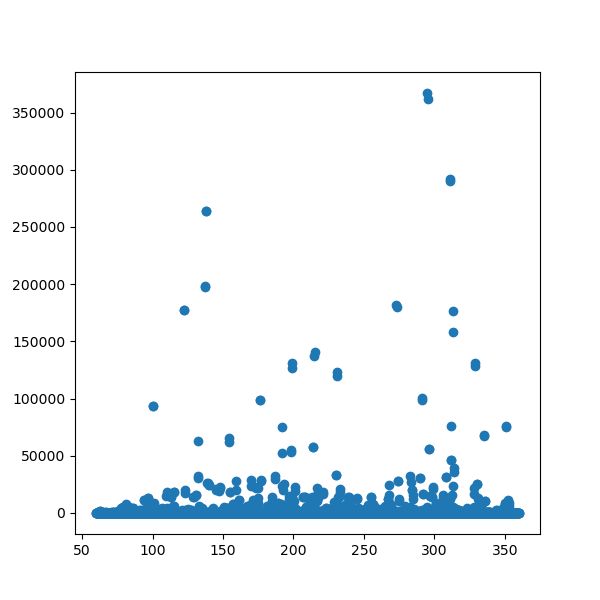

In [89]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [6, 6]
fig, ax = plt.subplots()
plt.scatter(x,y)


In [93]:
import spectrum_utils.plot as sup
import spectrum_utils.spectrum as sus
# https://spectrum-utils.readthedocs.io/en/latest/quickstart.html

In [94]:
spectrum = sus.MsmsSpectrum('identifier', 
                            100, 
                            1, 
                            x, 
                            y,
                            retention_time=0, 
                            peptide='peptide')

In [95]:
"""
spectrum = sus.MsmsSpectrum(
    identifier, precursor_mz, precursor_charge, mz, intensity,
    retention_time=retention_time, peptide=peptide)
"""

'\nspectrum = sus.MsmsSpectrum(\n    identifier, precursor_mz, precursor_charge, mz, intensity,\n    retention_time=retention_time, peptide=peptide)\n'

<IPython.core.display.Javascript object>


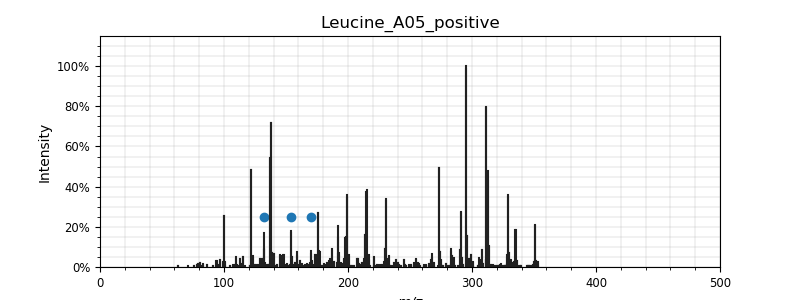

In [96]:
fig, ax = plt.subplots(figsize=(8, 3))
spectrum = (spectrum.set_mz_range(min_mz=60, max_mz=360))
sup.spectrum(spectrum, ax=ax)
plt.title('Leucine_A05_positive')
a = [132.1, 154.1, 170.1]
b = [0.25, 0.25, 0.25]
plt.scatter(a,b)
plt.show()

In [297]:
spectrum = sus.MsmsSpectrum('identifier', 
                            100, 
                            1, 
                            x, 
                            z,
                            retention_time=0, 
                            peptide='peptide')

<IPython.core.display.Javascript object>


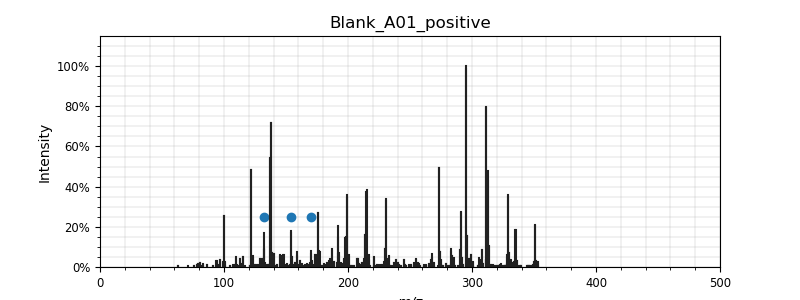

In [97]:
fig, ax = plt.subplots(figsize=(8, 3))
spectrum = (spectrum.set_mz_range(min_mz=60, max_mz=360))
sup.spectrum(spectrum, ax=ax)
plt.title('Blank_A01_positive')
a = [132.1, 154.1, 170.1]
b = [0.25, 0.25, 0.25]
plt.scatter(a,b)
plt.show()

In [ ]:
Next-steps:
    1) Sheets metadata --> csv --> pd keyed on position.
    2) Normalize intensity 0-1
    3) img_df flatten y axis into list of arrays keyed on position.
    4) Join on position.
    5) Score for presence or absence of parents and losses.
        --> A reasonable number should have target mass...
    6) Compare to theo and obsd from real dataset.
        
    

In [98]:
m = pd.read_csv('IMS_grid_meta.tsv', sep='\t')

In [99]:
m

,n,C,R,CR,Name,INCHI,hmdb,exact,MH_a,MH_CN,...,MK_CO2H,MK_COH,MK_H2O,MK_NH2,MmH_a,MmH_CN,MmH_CO2H,MmH_COH,MmH_H2O,MmH_NH2
0,1,A,5,A05,L-Leucine,"InChI=1S/C6H13NO2/c1-4(2)3-5(7)6(8)9/h4-5H,3,7...",HMDB0000687,131.0946,132.1019,105.0910,...,124.0523,140.0472,152.0472,153.0312,130.0873,103.0764,84.0818,100.0767,112.0767,113.0607
1,3,C,5,C05,Myo-Inositol,InChI=1S/C6H12O6/c7-1-2(8)4(10)6(12)5(11)3(1)9...,HMDB0000211,180.0634,181.0707,154.0598,...,173.0211,189.0160,201.0160,202.0000,179.0561,152.0452,133.0506,149.0455,161.0455,162.0295
2,5,E,5,E05,Myo-Inositol,InChI=1S/C6H12O6/c7-1-2(8)4(10)6(12)5(11)3(1)9...,HMDB0000211,180.0634,181.0707,154.0598,...,173.0211,189.0160,201.0160,202.0000,179.0561,152.0452,133.0506,149.0455,161.0455,162.0295
3,7,G,5,G05,L-Phenylalanine,InChI=1S/C9H11NO2/c10-8(9(11)12)6-7-4-2-1-3-5-...,HMDB0000159,165.0790,166.0863,139.0754,...,158.0367,174.0316,186.0316,187.0156,164.0717,137.0608,118.0662,134.0611,146.0611,147.0451
4,9,I,5,I05,L-Phenylalanine,InChI=1S/C9H11NO2/c10-8(9(11)12)6-7-4-2-1-3-5-...,HMDB0000159,165.0790,166.0863,139.0754,...,158.0367,174.0316,186.0316,187.0156,164.0717,137.0608,118.0662,134.0611,146.0611,147.0451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,321,I,31,I31,AMP,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,HMDB0000045,347.0631,348.0704,321.0595,...,340.0208,356.0157,368.0157,368.9997,346.0558,319.0449,300.0503,316.0452,328.0452,329.0292
143,325,A,32,A32,AMP,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,HMDB0000045,347.0631,348.0704,321.0595,...,340.0208,356.0157,368.0157,368.9997,346.0558,319.0449,300.0503,316.0452,328.0452,329.0292
144,327,C,32,C32,L-Asparagine,"InChI=1S/C4H8N2O3/c5-2(4(8)9)1-3(6)7/h2H,1,5H2...",HMDB0000168,132.0535,133.0608,106.0499,...,125.0112,141.0061,153.0061,153.9901,131.0462,104.0353,85.0407,101.0356,113.0356,114.0196
145,329,E,32,E32,L-Asparagine,"InChI=1S/C4H8N2O3/c5-2(4(8)9)1-3(6)7/h2H,1,5H2...",HMDB0000168,132.0535,133.0608,106.0499,...,125.0112,141.0061,153.0061,153.9901,131.0462,104.0353,85.0407,101.0356,113.0356,114.0196


In [100]:
grid

,mz,A01_int,A02_int,A03_int,A04_int,A05_int,A06_int,A07_int,A08_int,A09_int,...,K23_int,K24_int,K25_int,K26_int,K27_int,K28_int,K29_int,K30_int,K31_int,K32_int
0,60.0,152,168,306,369,0,57,222,634,147,...,853,1228,605,297,1879,1428,1268,2805,6613,4640
1,60.1,152,168,388,412,44,57,222,673,147,...,893,1228,679,297,1879,1428,1268,2849,6613,4684
2,60.2,122,0,176,82,142,0,0,161,53,...,40,43,118,0,81,0,44,44,42,43
3,60.3,156,129,94,183,230,47,44,167,176,...,0,88,44,41,164,0,133,0,42,42
4,60.4,75,129,43,143,133,88,88,45,123,...,43,45,0,87,122,40,89,129,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,359.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,359.6,0,0,0,46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,359.7,0,0,0,46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,359.8,0,0,0,0,0,0,0,0,0,...,0,55,0,0,0,0,0,0,0,0


In [101]:
headers = grid.columns
from sklearn.preprocessing import minmax_scale

In [102]:
join_dict = {}
for head in headers:
    arr = np.array(grid[head])
    h = head.split('_')[0]
    if h == 'mz':
        join_dict[h] = arr
    else:
        arr = minmax_scale(arr, feature_range=(0,1))
        join_dict[h] = arr

In [103]:
join_dict

{'mz': array([ 60. ,  60.1,  60.2, ..., 359.7, 359.8, 359.9]),
 'A01': array([0.00046834, 0.00046834, 0.0003759 , ..., 0.        , 0.        ,
        0.        ]),
 'A02': array([0.00061628, 0.00061628, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 'A03': array([0.00110016, 0.00139497, 0.00063277, ..., 0.        , 0.        ,
        0.        ]),
 'A04': array([0.00127354, 0.00142195, 0.00028301, ..., 0.00015876, 0.        ,
        0.        ]),
 'A05': array([0.        , 0.00011985, 0.00038679, ..., 0.        , 0.        ,
        0.        ]),
 'A06': array([0.00023526, 0.00023526, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 'A07': array([0.00075301, 0.00075301, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 'A08': array([0.00239451, 0.00254181, 0.00060807, ..., 0.        , 0.        ,
        0.        ]),
 'A09': array([0.00044666, 0.00044666, 0.00016104, ..., 0.        , 0.        ,
        0.        ]),
 'A10': array([0.00

In [104]:
m['mz'] = m.apply(lambda x: join_dict['mz'], axis =1)

In [105]:
m['int'] = m['CR'].apply(lambda x: join_dict[x])

In [106]:
m

,n,C,R,CR,Name,INCHI,hmdb,exact,MH_a,MH_CN,...,MK_H2O,MK_NH2,MmH_a,MmH_CN,MmH_CO2H,MmH_COH,MmH_H2O,MmH_NH2,mz,int
0,1,A,5,A05,L-Leucine,"InChI=1S/C6H13NO2/c1-4(2)3-5(7)6(8)9/h4-5H,3,7...",HMDB0000687,131.0946,132.1019,105.0910,...,152.0472,153.0312,130.0873,103.0764,84.0818,100.0767,112.0767,113.0607,"[60.0, 60.1, 60.2, 60.300000000000004, 60.4000...","[0.0, 0.0001198495343573205, 0.000386787133607..."
1,3,C,5,C05,Myo-Inositol,InChI=1S/C6H12O6/c7-1-2(8)4(10)6(12)5(11)3(1)9...,HMDB0000211,180.0634,181.0707,154.0598,...,201.0160,202.0000,179.0561,152.0452,133.0506,149.0455,161.0455,162.0295,"[60.0, 60.1, 60.2, 60.300000000000004, 60.4000...","[0.0026451128041142923, 0.002825628858991173, ..."
2,5,E,5,E05,Myo-Inositol,InChI=1S/C6H12O6/c7-1-2(8)4(10)6(12)5(11)3(1)9...,HMDB0000211,180.0634,181.0707,154.0598,...,201.0160,202.0000,179.0561,152.0452,133.0506,149.0455,161.0455,162.0295,"[60.0, 60.1, 60.2, 60.300000000000004, 60.4000...","[0.0018186785310072982, 0.0018186785310072982,..."
3,7,G,5,G05,L-Phenylalanine,InChI=1S/C9H11NO2/c10-8(9(11)12)6-7-4-2-1-3-5-...,HMDB0000159,165.0790,166.0863,139.0754,...,186.0316,187.0156,164.0717,137.0608,118.0662,134.0611,146.0611,147.0451,"[60.0, 60.1, 60.2, 60.300000000000004, 60.4000...","[0.0005058882324265159, 0.0005058882324265159,..."
4,9,I,5,I05,L-Phenylalanine,InChI=1S/C9H11NO2/c10-8(9(11)12)6-7-4-2-1-3-5-...,HMDB0000159,165.0790,166.0863,139.0754,...,186.0316,187.0156,164.0717,137.0608,118.0662,134.0611,146.0611,147.0451,"[60.0, 60.1, 60.2, 60.300000000000004, 60.4000...","[0.0002246884879880119, 0.00030076411777922856..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,321,I,31,I31,AMP,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,HMDB0000045,347.0631,348.0704,321.0595,...,368.0157,368.9997,346.0558,319.0449,300.0503,316.0452,328.0452,329.0292,"[60.0, 60.1, 60.2, 60.300000000000004, 60.4000...","[0.013820621998989773, 0.013993050131958236, 0..."
143,325,A,32,A32,AMP,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,HMDB0000045,347.0631,348.0704,321.0595,...,368.0157,368.9997,346.0558,319.0449,300.0503,316.0452,328.0452,329.0292,"[60.0, 60.1, 60.2, 60.300000000000004, 60.4000...","[0.0009482724735662907, 0.0009482724735662907,..."
144,327,C,32,C32,L-Asparagine,"InChI=1S/C4H8N2O3/c5-2(4(8)9)1-3(6)7/h2H,1,5H2...",HMDB0000168,132.0535,133.0608,106.0499,...,153.0061,153.9901,131.0462,104.0353,85.0407,101.0356,113.0356,114.0196,"[60.0, 60.1, 60.2, 60.300000000000004, 60.4000...","[0.02003543491810052, 0.020247857681417212, 0...."
145,329,E,32,E32,L-Asparagine,"InChI=1S/C4H8N2O3/c5-2(4(8)9)1-3(6)7/h2H,1,5H2...",HMDB0000168,132.0535,133.0608,106.0499,...,153.0061,153.9901,131.0462,104.0353,85.0407,101.0356,113.0356,114.0196,"[60.0, 60.1, 60.2, 60.300000000000004, 60.4000...","[0.025368376704760744, 0.025368376704760744, 0..."


In [142]:
meta = pd.read_pickle('test_02.pickle')

In [143]:
meta.head(5)

,n,C,R,CR,Name,INCHI,hmdb,exact,MH_a,MH_CN,...,MNa_CO2H_IDd_0.01,MNa_COH_IDd_0.01,MNa_H2O_IDd_0.01,MNa_NH2_IDd_0.01,MK_a_IDd_0.01,MK_CN_IDd_0.01,MK_CO2H_IDd_0.01,MK_COH_IDd_0.01,MK_H2O_IDd_0.01,MK_NH2_IDd_0.01
0,1,A,5,A05,L-Leucine,"InChI=1S/C6H13NO2/c1-4(2)3-5(7)6(8)9/h4-5H,3,7...",HMDB0000687,131.0946,132.1019,105.0910,...,False,False,False,False,True,False,False,False,False,False
1,3,C,5,C05,Myo-Inositol,InChI=1S/C6H12O6/c7-1-2(8)4(10)6(12)5(11)3(1)9...,HMDB0000211,180.0634,181.0707,154.0598,...,False,False,False,False,True,False,False,False,False,False
2,5,E,5,E05,Myo-Inositol,InChI=1S/C6H12O6/c7-1-2(8)4(10)6(12)5(11)3(1)9...,HMDB0000211,180.0634,181.0707,154.0598,...,False,False,False,False,False,False,False,False,False,False
3,7,G,5,G05,L-Phenylalanine,InChI=1S/C9H11NO2/c10-8(9(11)12)6-7-4-2-1-3-5-...,HMDB0000159,165.0790,166.0863,139.0754,...,False,False,True,False,False,False,False,False,False,False
4,9,I,5,I05,L-Phenylalanine,InChI=1S/C9H11NO2/c10-8(9(11)12)6-7-4-2-1-3-5-...,HMDB0000159,165.0790,166.0863,139.0754,...,False,False,False,False,False,False,False,False,False,False


In [144]:
headers = list(meta.columns)

In [145]:
headers

['n',
 'C',
 'R',
 'CR',
 'Name',
 'INCHI',
 'hmdb',
 'exact',
 'MH_a',
 'MH_CN',
 'MH_CO2H',
 'MH_COH',
 'MH_H2O',
 'MH_NH2',
 'MNa_a',
 'MNa_CN',
 'MNa_CO2H',
 'MNa_COH',
 'MNa_H2O',
 'MNa_NH2',
 'MK_a',
 'MK_CN',
 'MK_CO2H',
 'MK_COH',
 'MK_H2O',
 'MK_NH2',
 'MmH_a',
 'MmH_CN',
 'MmH_CO2H',
 'MmH_COH',
 'MmH_H2O',
 'MmH_NH2',
 'mz',
 'int',
 'MH_a_IDd_0.01',
 'MH_CN_IDd_0.01',
 'MH_CO2H_IDd_0.01',
 'MH_COH_IDd_0.01',
 'MH_H2O_IDd_0.01',
 'MH_NH2_IDd_0.01',
 'MNa_a_IDd_0.01',
 'MNa_CN_IDd_0.01',
 'MNa_CO2H_IDd_0.01',
 'MNa_COH_IDd_0.01',
 'MNa_H2O_IDd_0.01',
 'MNa_NH2_IDd_0.01',
 'MK_a_IDd_0.01',
 'MK_CN_IDd_0.01',
 'MK_CO2H_IDd_0.01',
 'MK_COH_IDd_0.01',
 'MK_H2O_IDd_0.01',
 'MK_NH2_IDd_0.01']

In [146]:
meta = meta[(meta.exact < 360) & (meta.exact > 60)]

In [147]:
view = ['CR', 'Name','MH_a_IDd_0.01', 'MH_CN_IDd_0.01', 'MH_CO2H_IDd_0.01', 'MH_COH_IDd_0.01',
 'MH_H2O_IDd_0.01', 'MH_NH2_IDd_0.01', 'MNa_a_IDd_0.01', 'MNa_CN_IDd_0.01', 'MNa_CO2H_IDd_0.01',
 'MNa_COH_IDd_0.01', 'MNa_H2O_IDd_0.01', 'MNa_NH2_IDd_0.01', 'MK_a_IDd_0.01', 'MK_CN_IDd_0.01',
 'MK_CO2H_IDd_0.01', 'MK_COH_IDd_0.01', 'MK_H2O_IDd_0.01', 'MK_NH2_IDd_0.01']

In [148]:
view = ['CR', 'Name','MH_a_IDd_0.01', 'MNa_a_IDd_0.01', 'MK_a_IDd_0.01']

In [149]:
v = meta[view]

In [150]:
v.groupby(['Name']).mean().round(2)

,MH_a_IDd_0.01,MNa_a_IDd_0.01,MK_a_IDd_0.01
Name,,,
AMP,0.67,0.00,0.00
Adenine,1.00,1.00,1.00
Arabinose,0.00,1.00,0.33
Cytidine,1.00,1.00,1.00
Cytidine monophosphate,0.67,1.00,0.00
Fructose,0.00,1.00,0.67
Galactose,0.33,1.00,0.67
Glucose,0.33,0.67,0.33
Glycine,1.00,1.00,0.00
